## Task 4.2

- Explore the mapping data

In [1]:
import os, sys, copy, time
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('./../data/mapping_data/')

In [3]:
# load the data
map_data = pd.read_table('./75495_1_120_20221026_095711_dat.txt', sep = '|')
print('Shape of the mapped data is', map_data.shape)
map_data.head()

Shape of the mapped data is (1135631, 24)


,co_code,company_name,co_stkdate,bse_opening_price,bse_high_price,bse_low_price,bse_closing_price,bse_returns,bse_traded_qty,bse_traded_val,...,nse_opening_price,nse_high_price,nse_low_price,nse_closing_price,nse_returns,nse_traded_qty,nse_traded_val,nse_no_of_trans,nse_market_cap,nse_pe
0,100044,INDUCTO STEEL LTD.,01-01-2019,14.25,14.25,14.25,14.25,0.98,500.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100044,INDUCTO STEEL LTD.,02-01-2019,13.55,13.55,13.55,13.55,0.95,500.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100044,INDUCTO STEEL LTD.,03-01-2019,13.05,13.10,13.05,13.10,0.97,996.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100044,INDUCTO STEEL LTD.,14-01-2019,12.50,12.50,12.50,12.50,0.95,100.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100044,INDUCTO STEEL LTD.,17-01-2019,11.88,12.50,11.88,12.50,1.00,125.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Number of firms(companies)
map_data['company_name'].nunique()

2928

In [13]:
# Necessary variables: co_code, company_name, co_stkdate, 
# bse_closing_price, bse_returns, nse_closing_price, nse_returns, 
map_data = map_data[['co_code', 'company_name', 'co_stkdate', 'bse_closing_price', 'bse_returns', 'nse_closing_price', 'nse_returns']]
print('Shape of the mapped data is', map_data.shape)
map_data.head()

Shape of the mapped data is (1135631, 7)


,co_code,company_name,co_stkdate,bse_closing_price,bse_returns,nse_closing_price,nse_returns
0,100044,INDUCTO STEEL LTD.,01-01-2019,14.25,0.98,NaN,NaN
1,100044,INDUCTO STEEL LTD.,02-01-2019,13.55,0.95,NaN,NaN
2,100044,INDUCTO STEEL LTD.,03-01-2019,13.10,0.97,NaN,NaN
3,100044,INDUCTO STEEL LTD.,14-01-2019,12.50,0.95,NaN,NaN
4,100044,INDUCTO STEEL LTD.,17-01-2019,12.50,1.00,NaN,NaN


In [5]:
# stockdate should be in datetime format
map_data['co_stkdate'] = pd.to_datetime(map_data['co_stkdate'], format = "%d-%m-%Y", )

In [6]:
# check the info of the data
map_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135631 entries, 0 to 1135630
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   co_code            1135631 non-null  int64         
 1   company_name       1135631 non-null  object        
 2   co_stkdate         1135631 non-null  datetime64[ns]
 3   bse_opening_price  1059237 non-null  float64       
 4   bse_high_price     1059237 non-null  float64       
 5   bse_low_price      1059237 non-null  float64       
 6   bse_closing_price  1059237 non-null  float64       
 7   bse_returns        1059237 non-null  float64       
 8   bse_traded_qty     1059237 non-null  float64       
 9   bse_traded_val     1059237 non-null  float64       
 10  bse_no_of_trans    1059237 non-null  float64       
 11  bse_market_cap     1059236 non-null  float64       
 12  bse_pe             731694 non-null   float64       
 13  bse_pb             988759 n

In [20]:
# Data may be sorted, sort by company_name and stock date column 
map_data.sort_values(by = ['company_name', 'co_stkdate'], ascending = True, inplace = True)
# Take only necessary columns
map_data = map_data[['co_code','company_name','co_stkdate','bse_closing_price','nse_closing_price']]

## Partitioned the data into two time frames:

In [46]:
map_data_before_covid = map_data.loc[(map_data['co_stkdate'] >= '2019-07-01') &
                                    (map_data['co_stkdate'] <= '2019-12-31')]
map_data_before_covid.sort_values(by = ['co_code','company_name', 'co_stkdate'], ascending = True, inplace = True)
map_data_before_covid.reset_index(level=-1, drop = True, inplace=True)
map_data_before_covid.to_csv('./../../data/map_data_before_covid.csv')


C:\Users\System Administrator\AppData\Local\Temp\ipykernel_12992\319465334.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data_before_covid.sort_values(by = ['co_code','company_name', 'co_stkdate'], ascending = True, inplace = True)


In [48]:
map_data_after_covid = map_data.loc[(map_data['co_stkdate'] >= '2020-01-01') &
                                    (map_data['co_stkdate'] <= '2020-06-30')]
map_data_after_covid.sort_values(by = ['company_name', 'co_stkdate'], ascending = True, inplace = True)
map_data_after_covid.reset_index(level=-1, drop = True, inplace=True)
map_data_after_covid.to_csv('./../../data/map_data_after_covid.csv')

C:\Users\System Administrator\AppData\Local\Temp\ipykernel_12992\3092195983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data_after_covid.sort_values(by = ['company_name', 'co_stkdate'], ascending = True, inplace = True)


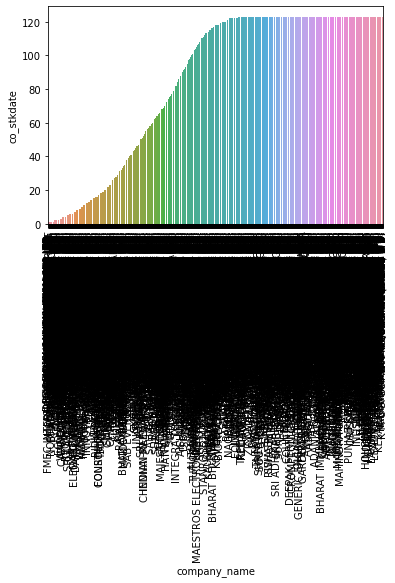

In [51]:
# Are all firms have same amount of stock data?
c_stkdata = map_data_before_covid.groupby(by = ['company_name'])['co_stkdate'].count()
c_stkdata = c_stkdata.reset_index()
c_stkdata.sort_values(by = ['co_stkdate'], inplace=True)
# No, all firms don't have same number of stock data
sns.barplot(x = 'company_name', y = 'co_stkdate', 
            data = c_stkdata.reset_index())
plt.xticks(rotation=90);

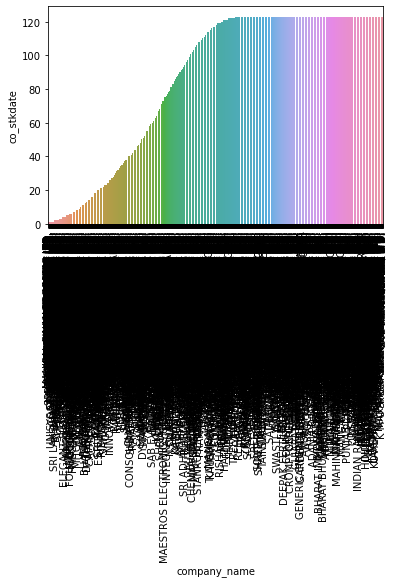

In [52]:
# Are all firms have same amount of stock data?
c_stkdata = map_data_after_covid.groupby(by = ['company_name'])['co_stkdate'].count()
c_stkdata = c_stkdata.reset_index()
c_stkdata.sort_values(by = ['co_stkdate'], inplace=True)
# No, all firms don't have same number of stock data
sns.barplot(x = 'company_name', y = 'co_stkdate', 
            data = c_stkdata.reset_index())
plt.xticks(rotation=90);

Before further proceed, we want to make some assumptions:
- We can ignore some companies, who does have less day data.
- Others

In [30]:
# Lets find which firms do not have NSE data
null_nse = map_data[pd.isnull(map_data['nse_closing_price'])]
null_nse_firms = null_nse.groupby(by = ['company_name'])['co_stkdate'].count()
null_nse_firms = null_nse_firms.reset_index()
null_nse_firms

,company_name,co_stkdate
0,3P LAND HOLDINGS LTD.,28
1,52 WEEKS ENTERTAINMENT LTD.,468
2,7NR RETAIL LTD.,479
3,7SEAS ENTERTAINMENT LTD.,68
4,A & M FEBCON LTD.,393
...,...,...
1774,ZENITH HEALTH CARE LTD.,558
1775,ZENITH STEEL PIPES & INDS. LTD.,5
1776,ZENLABS ETHICA LTD.,516
1777,ZIM LABORATORIES LTD.,548


In [31]:
null_bse = map_data[pd.isnull(map_data['bse_closing_price'])]
null_bse_firms = null_bse.groupby(by = ['company_name'])['co_stkdate'].count()
null_bse_firms = null_bse_firms.reset_index()
null_bse_firms

,company_name,co_stkdate
0,20 MICRONS LTD.,1
1,3P LAND HOLDINGS LTD.,209
2,5PAISA CAPITAL LTD.,7
3,A & M JUMBO BAGS LTD.,282
4,A K G EXIM LTD.,284
...,...,...
735,ZENITH STEEL PIPES & INDS. LTD.,82
736,ZICOM ELECTRONIC SECURITY SYSTEMS LTD.,50
737,ZODIAC ENERGY LTD.,285
738,ZODIAC-JRD-MKJ LTD.,89


In [37]:
map_data.isnull().sum()

co_code                   0
company_name              0
co_stkdate                0
bse_closing_price     76394
bse_returns           76394
nse_closing_price    487658
nse_returns          487658
dtype: int64

In [42]:
# There are no null data form both the exchange
map_data[pd.isna(map_data['bse_closing_price']) & pd.isna(map_data['nse_closing_price'])]

,co_code,company_name,co_stkdate,bse_closing_price,bse_returns,nse_closing_price,nse_returns


In [34]:
# There are total 1779 firms who has atleast one null values for nse
# There are total 740 firms who has atleast one null values for bse
# Now we need to decide a thresold of null values to choose the data 
# from which stock-exchange. (Our priority is NSE)
np.quantile(null_nse_firms['co_stkdate'], q = 0.5)

247.0

In [47]:
null_nse_firms[null_nse_firms['co_stkdate'] < 180]

,company_name,co_stkdate
0,3P LAND HOLDINGS LTD.,28
3,7SEAS ENTERTAINMENT LTD.,68
5,A A R COMMERCIAL CO. LTD. [MERGED],6
8,A C E EDUTREND LTD.,69
14,A K I INDIA LTD.,72
...,...,...
1768,YORK EXPORTS LTD.,108
1770,YURANUS INFRASTRUCTURE LTD.,98
1773,ZENITH EXPORTS LTD.,1
1775,ZENITH STEEL PIPES & INDS. LTD.,5


In [49]:
firms_nse = map_data[['co_code', 'company_name', 'co_stkdate', 'nse_closing_price', 'nse_returns']]

In [54]:
firms_nse = firms_nse.dropna()
np.sum(firms_nse.groupby(by = ['company_name'])['co_stkdate'].count() < 150)

69

In [55]:
firms_nse.to_csv('./../../data/firms_nse.csv')

In [69]:
micron_ltd = firms_nse[firms_nse['company_name'].str.contains('MICRONS LTD.')]
micron_ltd.reset_index(inplace=True)
micron_ltd

,index,co_code,company_name,co_stkdate,nse_closing_price,nse_returns
0,41393,11,20 MICRONS LTD.,2019-01-01,44.25,1.0500
1,41394,11,20 MICRONS LTD.,2019-01-02,44.05,1.0000
2,41395,11,20 MICRONS LTD.,2019-01-03,43.45,0.9900
3,41396,11,20 MICRONS LTD.,2019-01-04,42.25,0.9700
4,41397,11,20 MICRONS LTD.,2019-01-07,42.65,1.0100
...,...,...,...,...,...,...
553,41946,11,20 MICRONS LTD.,2021-03-24,35.20,0.9737
554,41947,11,20 MICRONS LTD.,2021-03-25,33.95,0.9645
555,41948,11,20 MICRONS LTD.,2021-03-26,34.50,1.0162
556,41949,11,20 MICRONS LTD.,2021-03-30,34.75,1.0072


In [70]:
micron_ltd.to_csv('./../../data/micron_ltd.csv')

In [67]:
micron_ltd['nse_closing_price'].pct_change()

41393         NaN
41394   -0.004520
41395   -0.013621
41396   -0.027618
41397    0.009467
           ...   
41946   -0.026279
41947   -0.035511
41948    0.016200
41949    0.007246
41950    0.011511
Name: nse_closing_price, Length: 558, dtype: float64

In [71]:
micron_ltd['nse_closing_price']

0      44.25
1      44.05
2      43.45
3      42.25
4      42.65
       ...  
553    35.20
554    33.95
555    34.50
556    34.75
557    35.15
Name: nse_closing_price, Length: 558, dtype: float64